# _Milk Production - Time Series Forecasting_
**_Importing The Required Libraries & Packages_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from math import sqrt
import pickle
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command along with that changing the index column with `Month` column and also changing the data type of `Month` columns as <span Style= 'color:red'> Date Time </span>_**

In [2]:
os.chdir('C:\\Users\\chand\\OneDrive\\Desktop\\Milk Production Time Series Project\\')
df = pd.read_csv('monthly-milk-production.csv',parse_dates=['Month'],index_col='Month')

## _Exploratory Data Analysis_
**_Checking the data type of the column in the dataset_**

In [3]:
df.dtypes

Milk Production    float64
dtype: object

**_Getting the shape of the dataset_**

In [4]:
df.shape

(168, 1)

**_Checking for the null values in the column from the dataset_**

In [5]:
df.isnull().sum()

Milk Production    0
dtype: int64

**_Getting the summary of various descriptive statistics for the numeric column in the dataset_**

In [6]:
df.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


## _Data Visualization_
**_Plotting the line graph to show the data trend in the dataset and saving the graph as PNG File_**

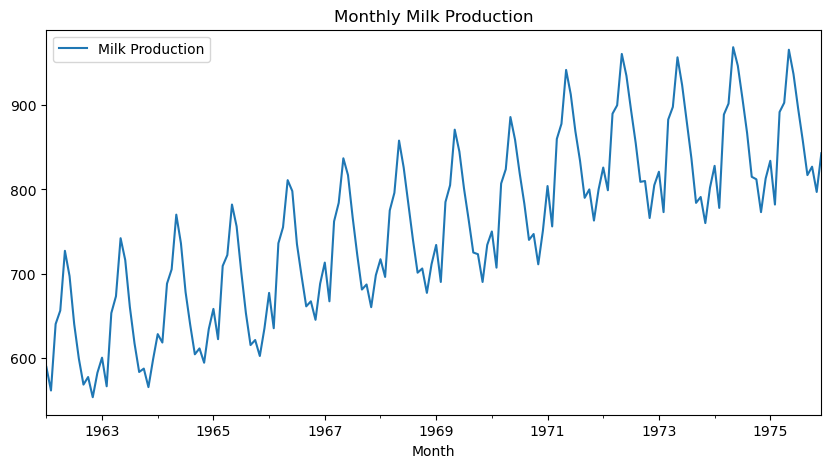

In [7]:
df.plot(figsize=(10,5))
plt.title('Monthly Milk Production')
plt.savefig('Monthly Milk Production.png')
plt.show()

**_Plotting the histogram and KDE line graph to show the distribution of data in the dataset and saving the graph as PNG File_**

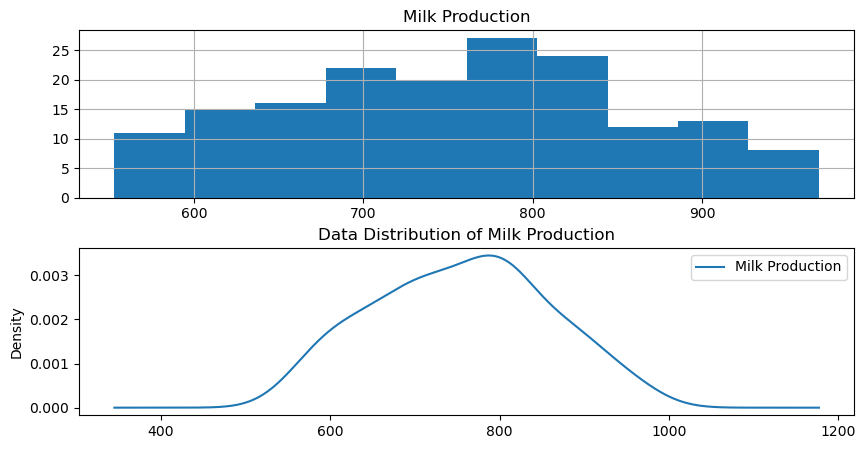

In [8]:
fig,(ax1,ax2)=plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10, 5))
df.hist(ax=ax1)
df.plot(kind = 'kde' , ax = ax2)
plt.title('Data Distribution of Milk Production')
plt.savefig('Data Distribution of Milk Production')
plt.show()

**_Plotting the graph with Seasonal Decomposition function to show the data discription ,trend , seasonal , residuals and saving the graph as PNG file._**

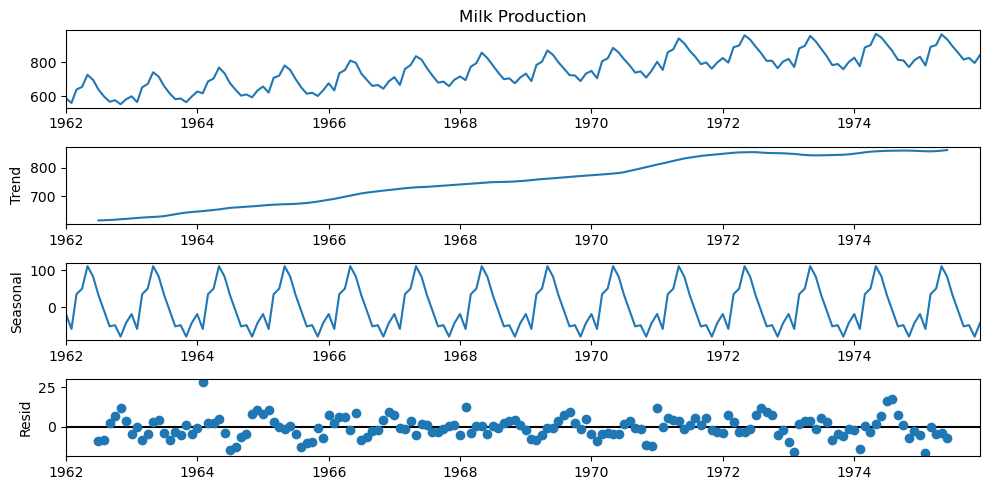

In [9]:
plt.rcParams['figure.figsize']=(10,5)
decomposition = seasonal_decompose(df['Milk Production'],period = 12 , model = 'additive')
decomposition.plot()
plt.savefig('Trend , Seasonal , Residual Graph.png')
plt.show()

**_Plotting the graph with Partial Autocorrelation and Auto Correleation of the data from the dataset and saving the graph as PNG file_**

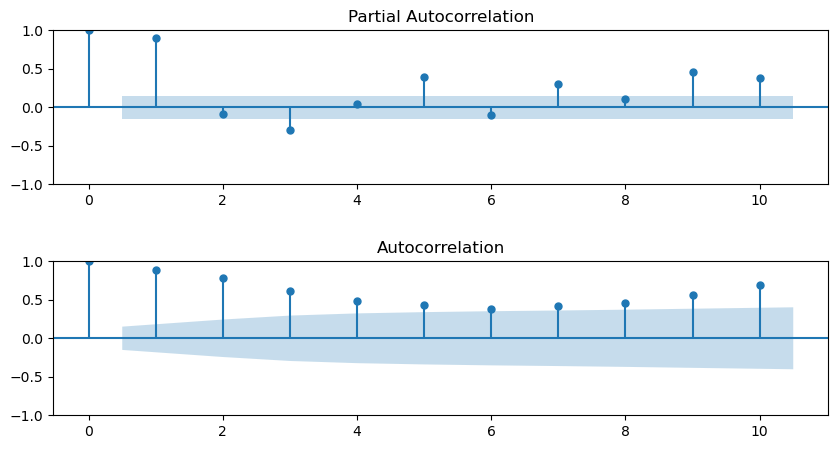

In [10]:
fig , (ax1 , ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10, 5))
ax1 = plot_pacf(df['Milk Production'] , lags = 10 , ax = ax1)
ax2 = plot_acf(df['Milk Production'] , lags = 10 , ax = ax2)
plt.subplots_adjust(hspace = 0.5)
plt.savefig('PACF and ACF.png')
plt.show()

## _Data Transformation_
_**The `adf_check()` function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary.
The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.**_

In [11]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test  :')
    labels = ['ADF Test Statistics','P-Value','Number Of Lag Used','Number Of Observation ','Critical Value']
    for value,label in zip(result,labels):
        print(label + ': '+ str(value))
    if result[1] <= 0.5:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

**_Performing the Augmented Dickey Fuller Test on the original data in the dataset to find whether the time series is a stationary or not_**

In [12]:
adf_check(df['Milk Production'])

Augmented Dickey Fuller Test  :
ADF Test Statistics: -1.3038115874221345
P-Value: 0.6274267086030293
Number Of Lag Used: 13
Number Of Observation : 154
Critical Value: {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


**_Since the time series is not a stationary , the dataset is transformed as a new dataframe with first difference and seasonal first difference to make it as a stationary series_**

In [13]:
df1 = df.diff().diff(12).dropna()

**_Performing the Augmented Dickey Fuller Test on the new transformed data in the dataset to find whether the time series is a stationary or not_**

In [14]:
adf_check(df1['Milk Production'])

Augmented Dickey Fuller Test  :
ADF Test Statistics: -5.03800227492198
P-Value: 1.865423431878859e-05
Number Of Lag Used: 11
Number Of Observation : 143
Critical Value: {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


**_Plotting the line graph to show the data trend in the transformed data from the dataset and saving the graph as PNG File_**

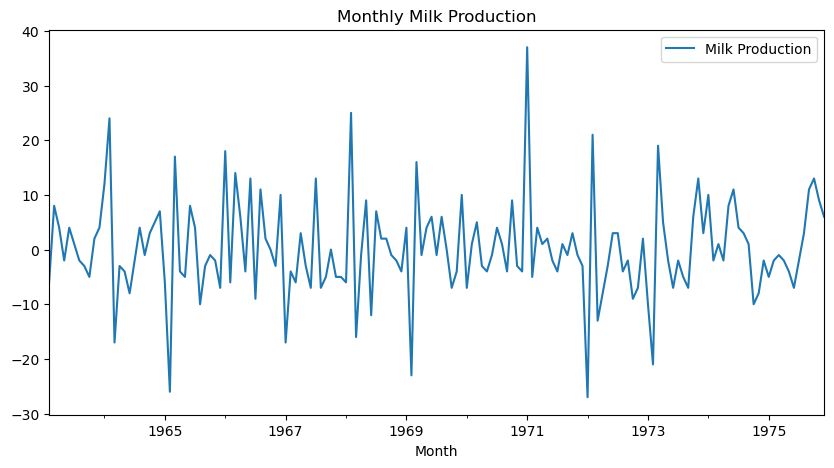

In [15]:
df1.plot(figsize=(10,5))
plt.title('Monthly Milk Production')
plt.savefig('Monthly Milk Production (transformed data).png')
plt.show()

**_Plotting the graph with pandas auto correlation plot to show the difference between the stationary data and non - stationary data and saving it as png file._**

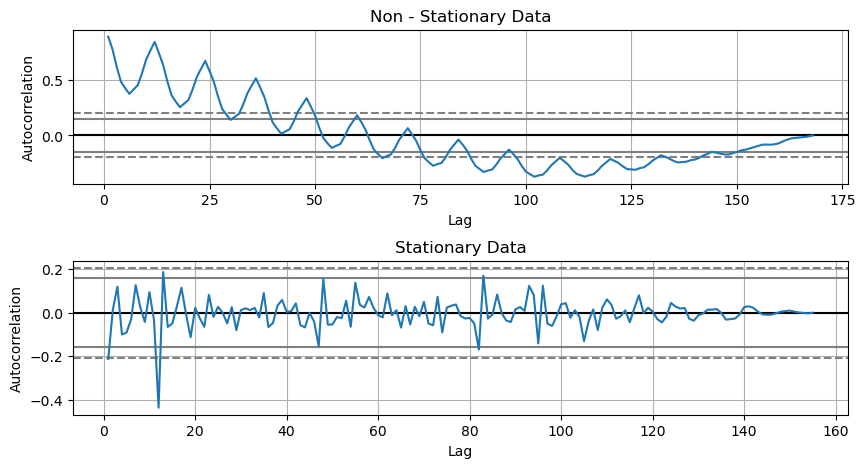

In [16]:
fig , (ax1 , ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10, 5))
ax1 = autocorrelation_plot(df['Milk Production'] , ax = ax1)
ax1.set_title('Non - Stationary Data')
ax2 = autocorrelation_plot(df1['Milk Production'] , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace=0.5)
plt.savefig('Auto Correlation plot of stationary and non - stationary data.png')
plt.show()

## _Model Fitting_
**_Getting the p value and q value for the model fitting using `auto_arima` function by passing through some needed parameters ,
the best model is evaluated by least Akaike Information Criterion (AIC)_**

In [17]:
model = auto_arima(df['Milk Production'],d = 1, D = 1, seasonal= True , m= 12 , max_order= 6,
                  start_P= 0 , start_Q= 0 ,test = 'adf', trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1105.373, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1119.969, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1081.584, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1066.296, Time=0.31 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1114.995, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.030, Time=0.43 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1067.976, Time=0.62 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1082.123, Time=0.22 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1072.280, Time=0.20 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1068.064, Time=0.42 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1067.796, Time=0.35 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1066.207, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1114.845, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[12]

**_Defining the summary of the model fitted with `auto_arima` function , here getting various information such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) , Hannan-Quinn Information Criterion (HQIC), Log Likelihood etc. From which we can evaluate the model_**

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Fri, 21 Jul 2023   AIC                           1066.207
Time:                                      13:18:24   BIC                           1075.337
Sample:                                  01-01-1962   HQIC                          1069.916
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**_Splitting the dataset in training data(85%) and test data(15%)_**

In [19]:
train = df[:int(0.85*len(df))]
test = df[int(0.85*len(df)):]

**_Getting the shape of training data and test data , so that we can able to show the exact observations in the training and test data_**

In [20]:
train.shape , test.shape

((142, 1), (26, 1))

**_Fitting the model in SARIMAX model with the best value got from the `auto_arima` in the training data and getting the summary of the fitted model_**

In [21]:
model = SARIMAX(train['Milk Production'], order= (1,1,0), seasonal_order=(0,1,1,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      Milk Production   No. Observations:                  142
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -445.603
Date:                              Fri, 21 Jul 2023   AIC                            897.205
Time:                                      13:18:24   BIC                            905.785
Sample:                                  01-01-1962   HQIC                           900.691
                                       - 10-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2728      0.087     -3.149      0.002      -0.443      -0.103
ma.S.L12      -0.6158      0.086     -7.163      0.000      -0.784      -0.447
sigma2        56.0243      5.765      9.719      0.000      44.726      67.323
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                40.04
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.86
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**_Plotting the diagnostic plot for the fitted model to show the best fit of the model and saving it as png file._**

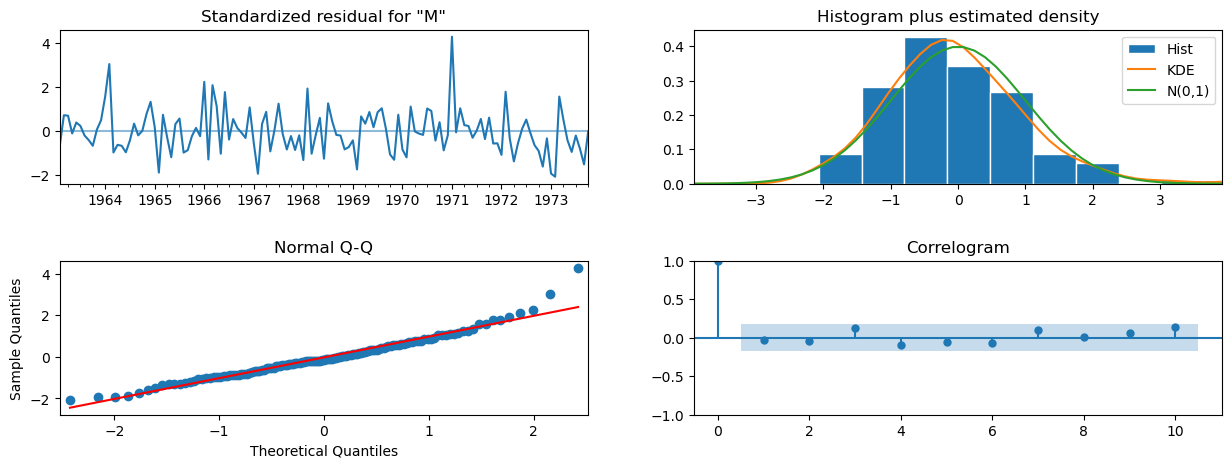

In [22]:
result.plot_diagnostics(figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

**_Predicting the value using test data and renaming it as "Prediction"_**

In [23]:
prediction = result.predict(len(train), len(train)+len(test) -1 , typ = 'levels').rename('Prediction')

**_Comparing the predicted value with actual value in the test data_**

In [24]:
for i in range(len(prediction)):
    print(f"predicted = {prediction[i]:<6.5}, expected = {test['Milk Production'][i]}")

predicted = 752.78, expected = 760.0
predicted = 791.71, expected = 802.0
predicted = 816.61, expected = 828.0
predicted = 775.71, expected = 778.0
predicted = 876.54, expected = 889.0
predicted = 891.67, expected = 902.0
predicted = 952.58, expected = 969.0
predicted = 923.4 , expected = 947.0
predicted = 880.27, expected = 908.0
predicted = 839.96, expected = 867.0
predicted = 792.91, expected = 815.0
predicted = 798.32, expected = 812.0
predicted = 760.53, expected = 773.0
predicted = 799.34, expected = 813.0
predicted = 824.27, expected = 834.0
predicted = 783.37, expected = 782.0
predicted = 884.2 , expected = 892.0
predicted = 899.33, expected = 903.0
predicted = 960.24, expected = 966.0
predicted = 931.06, expected = 937.0
predicted = 887.93, expected = 896.0
predicted = 847.62, expected = 858.0
predicted = 800.57, expected = 817.0
predicted = 805.97, expected = 827.0
predicted = 768.19, expected = 797.0
predicted = 807.0 , expected = 843.0


**_Plotting the line graph with the predicted value and test data value and saving the graph as png file._**

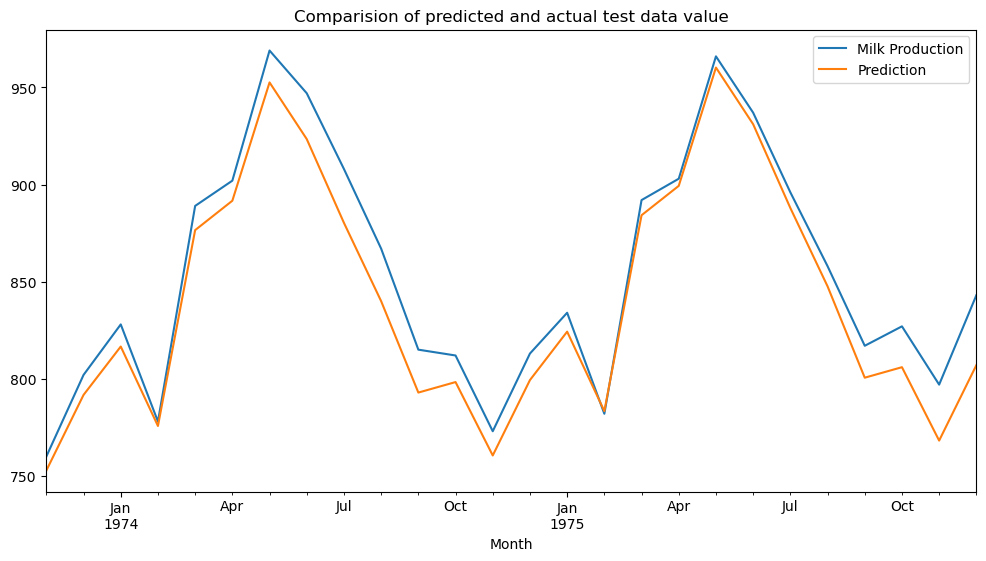

In [25]:
test['Milk Production'].plot(figsize = (12,6))
prediction.plot()
plt.title('Comparision of predicted and actual test data value')
plt.savefig('Comparision of predicted and actual test data value.png')
plt.legend()
plt.show()

## _Model Evaluation_
**_Evaluating the model with the following metrics such as r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and test data value._**

In [26]:
print('Evaluation result for test data : \n')
print('Percentage of R2 Score : {}%'.format(100*(r2_score(test['Milk Production'],prediction))),'\n')
print('Mean Squared Error : ',mean_squared_error(test['Milk Production'],prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test['Milk Production'],prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test['Milk Production'],prediction)),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test['Milk Production'],
                                                                                              prediction)),'\n')

Evaluation result for test data : 

Percentage of R2 Score : 92.40433775017998% 

Mean Squared Error :  274.9406134318325 

Mean Absolute Error :  14.062888149558145 

Root Mean Squared Error :  16.58133328269571 

 Mean Absolute Percentage Error : 1.65 % 



**_Creating the pickle file with the best model that gives the high R2 Score for the test data._**

In [27]:
pickle.dump(result,open('Best Model.pkl','wb'))

**_Loading the pickle file and predicting the whole data for testing_**

In [28]:
model = pickle.load(open('Best Model.pkl','rb'))
pred = model.predict(0,167 , typ = 'levels')

**_Evaluating the model with the following metrics such as r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and whole data_**

In [29]:
print('Evaluation result for Whole data : \n')
print('Percentage of R2 Score : {}%'.format(100*(r2_score(df['Milk Production'],pred))),'\n')
print('Mean Squared Error : ',mean_squared_error(df['Milk Production'],pred),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df['Milk Production'],pred),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df['Milk Production'],pred)),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df['Milk Production'],
                                                                                              pred)),'\n')

Evaluation result for Whole data : 

Percentage of R2 Score : 73.71070000541555% 

Mean Squared Error :  2729.772481115499 

Mean Absolute Error :  14.246360944360877 

Root Mean Squared Error :  52.24722462595979 

 Mean Absolute Percentage Error : 2.12 % 



## _Forecasting_
**_Forecasting the result for the future dates using the loaded model_**

In [30]:
Forecast = result.predict(start = '1976-01-01', end = '1980-12-01')

**_Plotting the line graph with given data and predicted future data and saving it as png file._**

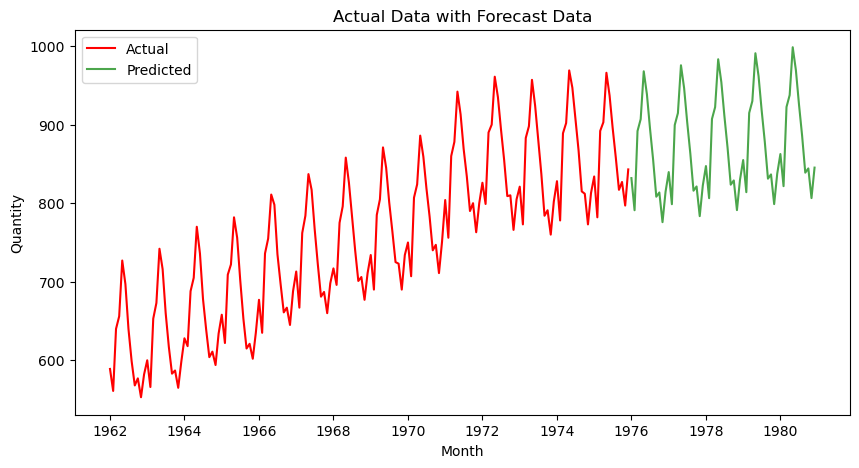

In [31]:
plt.plot(df, color = 'red', label = 'Actual',alpha = 1)
plt.plot(Forecast, color = 'green', label = 'Predicted', alpha = 0.7)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Actual Data with Forecast Data')
plt.savefig('Actual Data with Forecast Data.png')
plt.legend()
plt.show()

**_Making the forecast value as dataframe and concating it with dataframe and exporting the dataframe to comma seperated value (csv) File_**

In [32]:
forecast_df=pd.DataFrame(Forecast)
forecast_df.rename(columns={'predicted_mean': 'Predicted Future Milk Production'}, inplace=True)
final = pd.concat([df,forecast_df],axis=1)
final['Predicted Future Milk Production'] = final['Predicted Future Milk Production'].round(2)
final.to_csv('Future Predicted  Milk Production.csv ')